In [1]:
#The Uniform DIstribution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
uniform = stats.uniform.rvs(size=100000, loc=1, scale=6)
uniform_df= pd.DataFrame(uniform)

In [6]:
uniform_df.columns=['value']

<AxesSubplot:ylabel='Density'>

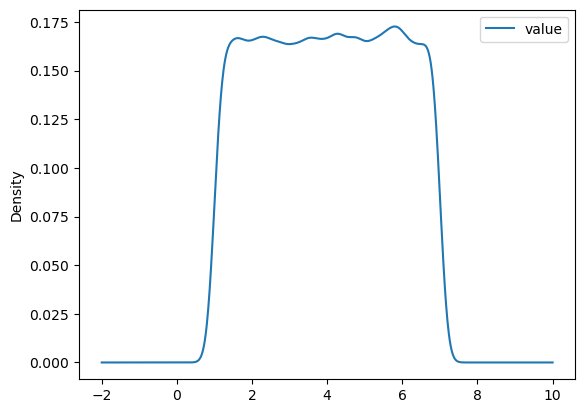

In [7]:
uniform_df.plot(kind='density')

In [14]:

stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # inicio distribucion
                  scale=10)      #Final de la distribucion

0.25

In [ ]:
#En la distribución uniforme anterior, hay un 25 % de probabilidad de que una observación esté en el rango de 0 a 2,5 
#y un 75 % de probabilidad de que caiga en el rango de 2,5 a 10.

In [15]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # inicio  Distribucion 
                  scale=10)      # Final de la Distribucion 

4.0

In [ ]:
#El ejemplo usado es para saber el cutoff value(cuantil) 
#para el cual hay un 40% de posiblidades de obtener una observacion por debajo de ese valor

In [16]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [17]:
#Entrega la densidad de probabilidad de un valor x dado.

In [18]:
#Generando numeros aleatorios y estableciendo  semilla

In [19]:
import random

In [21]:
random.randint(0,10)
#Entrega un entero en un rango especifico

10

In [22]:
random.choice([2,4,6,9])
#Entrega un numero aleatorio de una secuencia

2

In [23]:
random.random()
#Entrega un numero real entre 0 y 1

0.07214839620748337

In [25]:
random.uniform(0,10)
#Entrega un real en el rango especifico


9.68875935597236

In [26]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


In [27]:
#Observar que se generan exactamente los mismos numeors en los nos random.uniform, esto debido a que tienen la misma semilla
#Esto nos hace observar que los numeros generalmente son pseudorandom y no realmente random
#Muchas funciones en librerias de python usan aleatoriedad pero tienen un argumento de semilla opcional.

In [28]:
#The normal distribution
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


In [29]:
#El resultado nos enseña que un 16% de los datos generados  estan por debajo de -1
#Un 16% tambien esta por encima de 1
#Y un 68% se encuentra entre -1 y 1

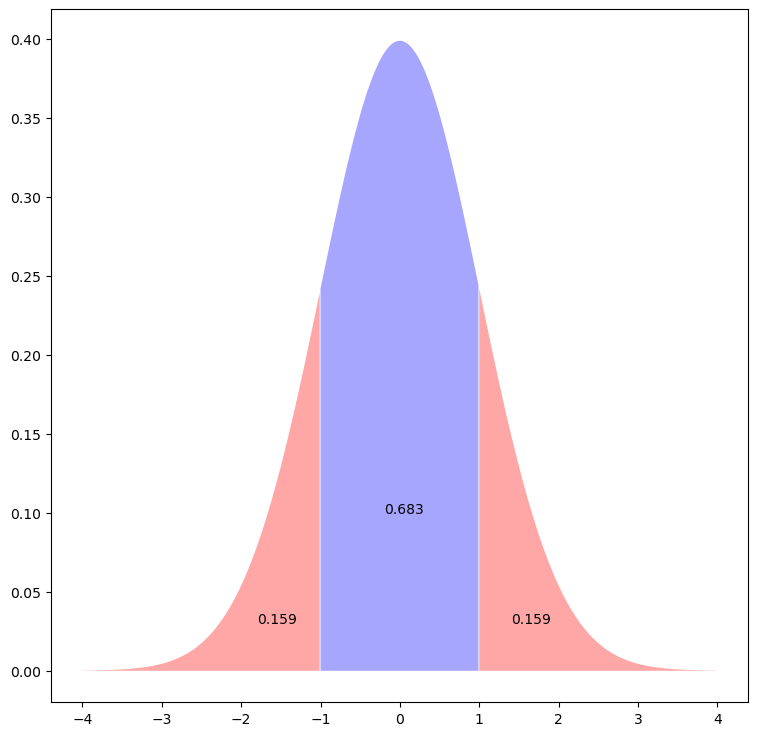

In [30]:
plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [31]:
print( stats.norm.ppf(q=0.025) ) # Encontrar el cuantil para el 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Encontrar el cuantil para el 97.5% cutoff

-1.9599639845400545
1.959963984540054


In [32]:
#El resultado del cuantil anterior confirma que aproximadamente el 5 % de los datos se encuentran a más de 2 desviaciones estándar de la media.


col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  12  118  408  1172  2130  2441  2010  1148  453  102   6


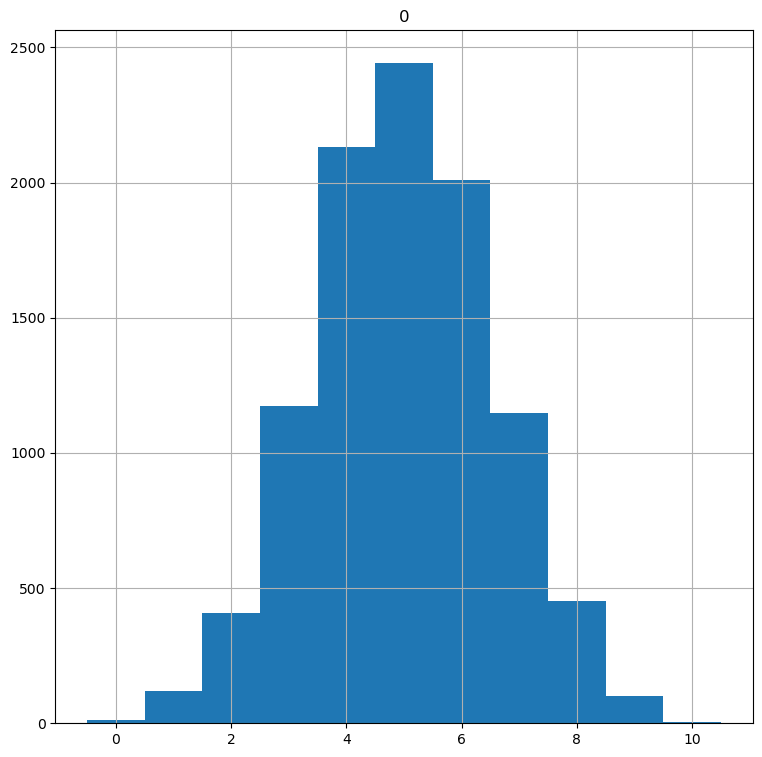

In [34]:
#Distribucion Binomial

fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);


In [35]:
#se modela el lanzamiento de una moneda al aire  con una distribución binomial donde el número de intentos se establece en 10 y la probabilidad de éxito se establece en 0,5.
#En este caso, la distribución nos diría qué tan probable es obtener cero caras, 1 cara, 2 caras y así sucesivamente.

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   8  59  244  912  1984  3041  2689  1063


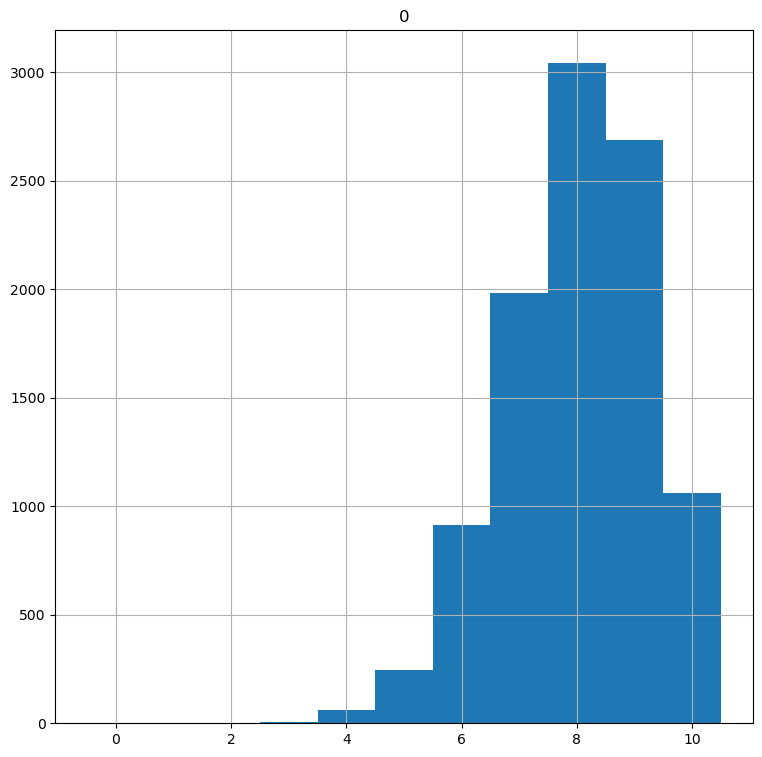

In [37]:
biased_coin_flips = stats.binom.rvs(n=10,      # Numbero de flips por intento
                                  p=0.8,       # Probabildiad de exito
                                  size=10000)  # Numero de intentos

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

In [38]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 

0.03279349759999997

In [39]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

In [40]:
stats.binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5

0.24609375000000003

In [41]:
stats.binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.30198988799999993

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  15  \
row_0                                                                         
counts  4907  2546  1248  632  327  165  89  46  19   7   8   1   1   1   2   

col_0   16  
row_0       
counts   1  


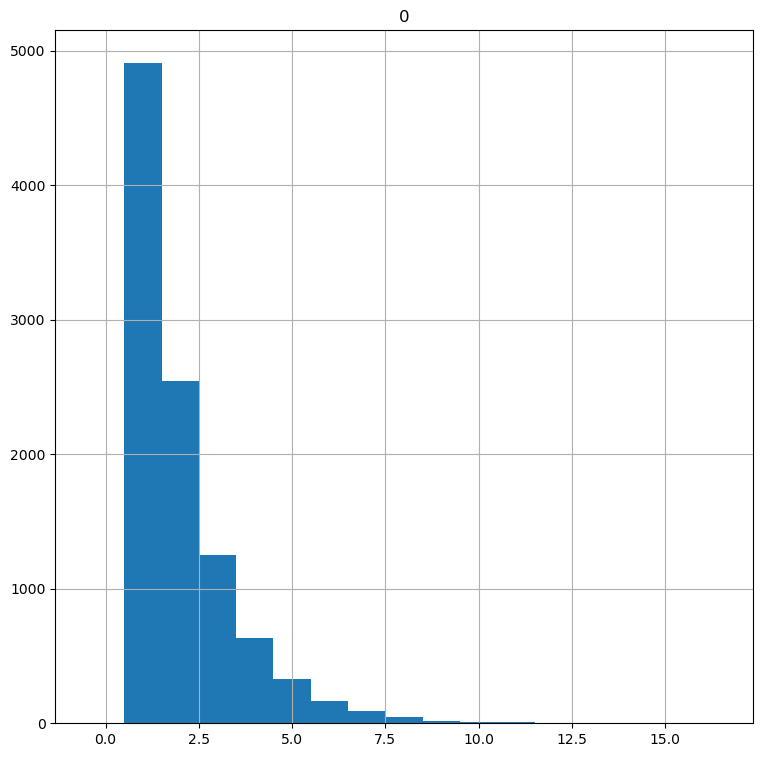

In [42]:
#Distribuciones geometrica y exponencial
#Modela la cantidad de tiempo que toma a un evento ocurrir


random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);


In [43]:
first_five = stats.geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

In [44]:
stats.geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

In [45]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = stats.expon.cdf(x=1,        
                         scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

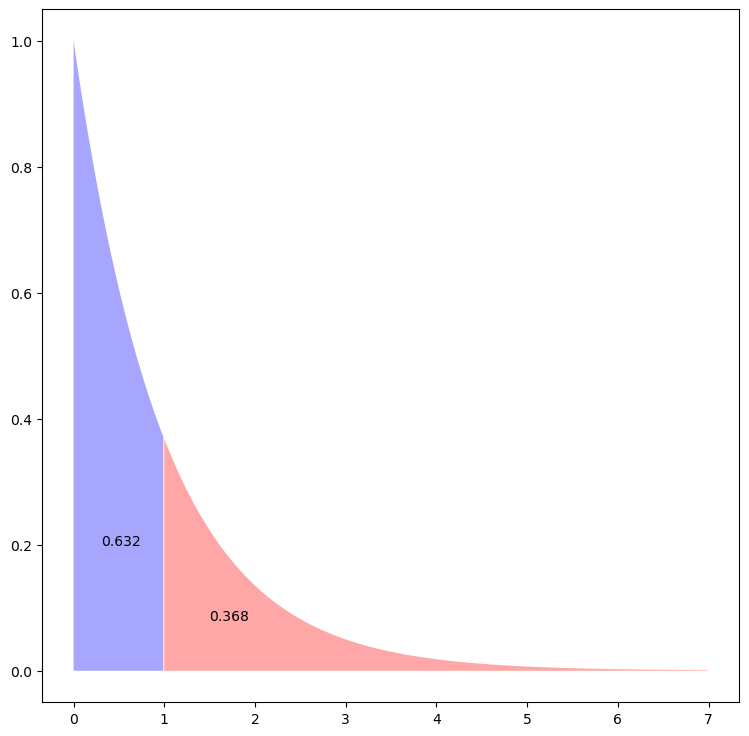

In [46]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= stats.expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= stats.expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3679  3785  1770  573  159  31  2  1


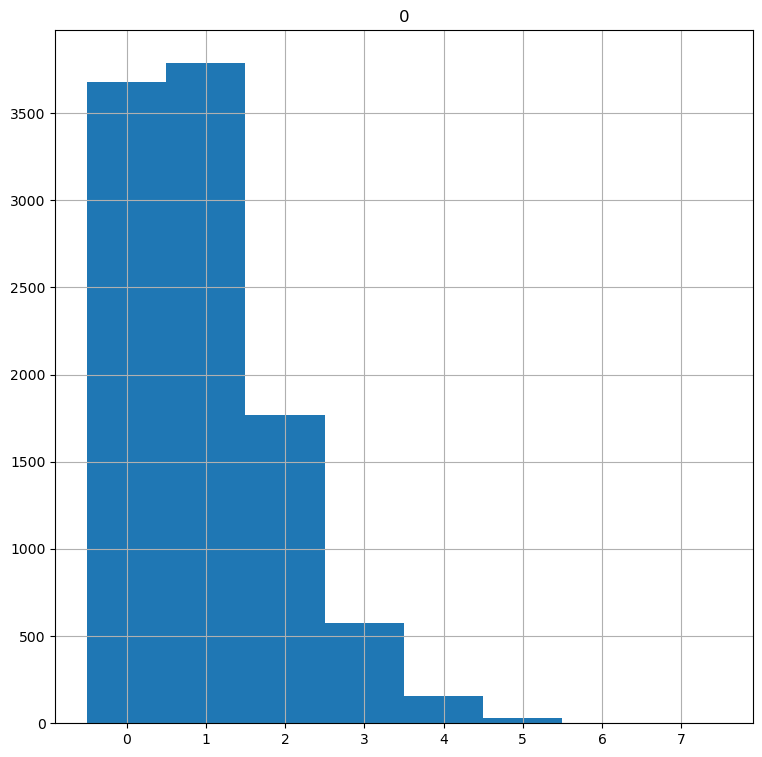

In [51]:
#Distribucion Poisson
#Modela la probabilidad de ver una cierta cantidad de sucesos en un intervalo de tiempo, donde el tiempo que toma el proximo suceso es modelado por una distribucion exponencial.


random.seed(12)

arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

In [ ]:
#El histograma muestra que cuando las llegadas son relativamente poco frecuentes, es raro ver más de un par de llegadas en cada período de tiempo.
# Cuando la tasa de llegadas es alta, se vuelve cada vez más raro ver un número bajo de llegadas y la distribución comienza a verse más simétrica:

col_0   1   2   3    4    5    6    7     8     9     10  ...   14   15   16  \
row_0                                                     ...                  
counts   5  29  82  172  370  653  908  1203  1248  1252  ...  505  392  205   

col_0   17  18  19  20  21  22  24  
row_0                               
counts  94  80  42  31  10   5   1  

[1 rows x 23 columns]


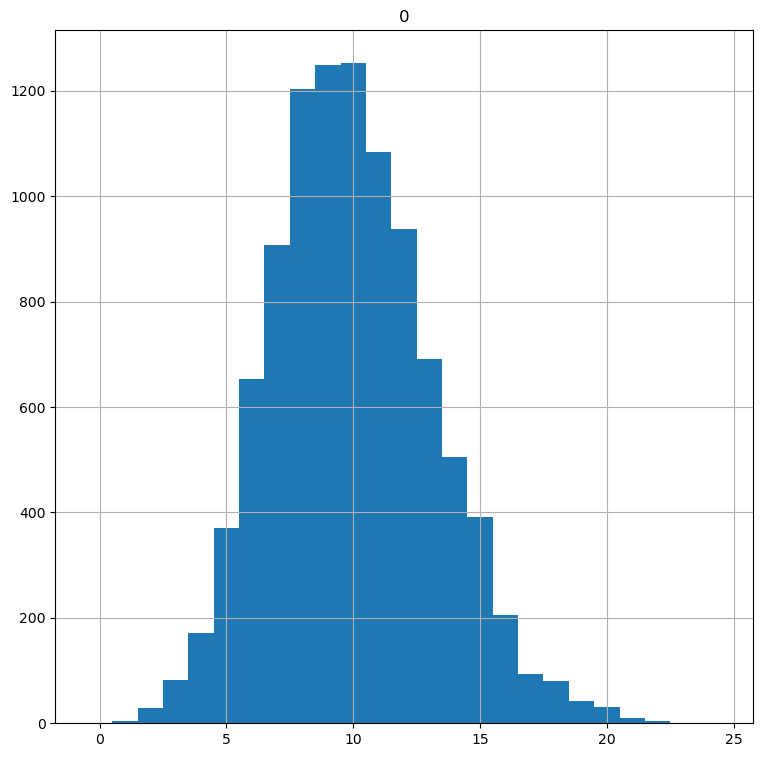

In [48]:
random.seed(12)

arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

In [49]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [50]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372